In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fftshift
from scipy.signal import find_peaks
from scipy.fft import fft, ifft
data = loadmat('Kraken.mat')
Kraken = data['Kraken']
df = pd.read_csv("Kraken.csv")


In [9]:
Kraken.shape

(262144, 49)

In [2]:
L = 10  # spatial domain
n = 64  # Fourier modes
threshold = 0.7  # Change this threshold to see what happens to the plot

x2 = np.linspace(-L, L, n+1)
x = x2[:n]
y = x
z = x

# create frequency array and rescale them to be 2pi periodic 
k = 2 * np.pi / (2 * L) * np.concatenate([np.arange(n/2), -1 * np.flip(np.arange(n/2) + 1)])

# shift values to order them correctly
ks = np.fft.fftshift(k)

X, Y, Z = np.meshgrid(x, y, z)
Kx, Ky, Kz = np.meshgrid(ks, ks, ks)

# above code is the given part from CP1.m

In [3]:
# sum all realizations in frequency space 
# after your for loop ends, save the sum as variable A1

A1 = np.zeros((n, n, n)) # initialize A1 to a cube.
for j in range(0, 49):
    Un = np.reshape(Kraken[:, j], (n, n, n), order="f")  # reshape the data
    A1 = A1 + np.fft.fftn(Un)  # fourier transform the data to frequency space

# Average the sum over the 49 realizations (i.e., A1/49) and save as A2
A2 = A1/49

# find the peak frequencies in x, y, and z directions; i.e., find the
# max in each direction of the normalized sum A2.
# save these variables as A3, A4, and A5
max_index = np.unravel_index(np.argmax(A2), A2.shape) # find the index of the max value
# trace back the index to the corresponding frequency in the non-shifted k array
A3 = k[max_index[0]]
A4 = k[max_index[1]]
A5 = k[max_index[2]]

In [4]:
max_index = np.unravel_index(np.argmax(A2), A2.shape)
k.shape

(64,)

In [5]:
# create an appropriate Gaussian filter and save it as A6
# bandwidth of the filter:
tau = 1/L

# create a Gaussian filter in x, y, and z directions
# We need to use shift k array to find where is the peac    k.
filter_x = np.exp(-tau*(Kx - Kx[max_index])**2)
filter_y = np.exp(-tau*(Ky - Ky[max_index])**2)
filter_z = np.exp(-tau*(Kz - Kz[max_index])**2)

A6 = filter_x * filter_y * filter_z

# Using the peak frequencies for the filtered signal, 
# estimate the x, y, and z coordinates of the Kraken over time and save as A7, A8, A9
A7 = np.zeros((1, 49))
A8 = np.zeros((1, 49))
A9 = np.zeros((1, 49))
for j in range(0, 49):
    Un = np.reshape(Kraken[:, j], (n, n, n), order="f")  # reshape the data
    Un = np.fft.fftn(Un)
    unft = Un * A6
    unft = np.fft.ifftn(unft)
    max_index = np.unravel_index(np.argmax(unft), unft.shape)
    A7[0, j] = x[max_index[0]]
    A8[0, j] = y[max_index[1]]
    A9[0, j] = z[max_index[2]]

In [6]:
A6.shape

(64, 64, 64)

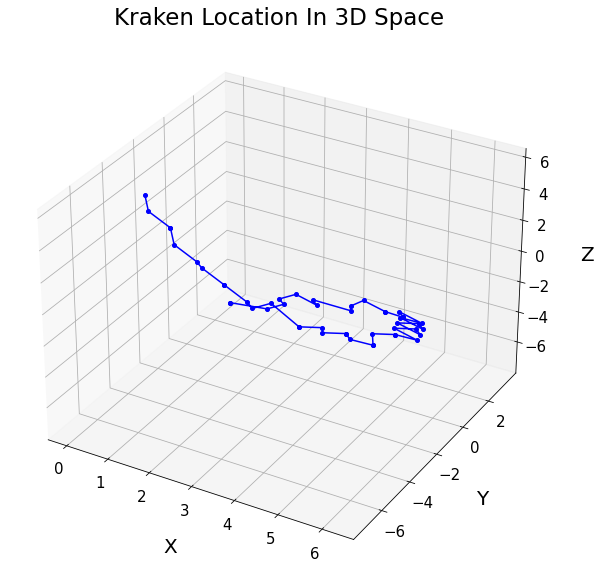

In [7]:
# Plot the location in x-y-z space over time for your report and export as Karken location.png file
# adject the figure size to make it look nice
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(A7[0, :], A8[0, :], A9[0, :], '-b.', markersize=8)

# put labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Kraken Location In 3D Space')

# change the label size and axis size to make it look nice
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.zaxis.label.set_size(20)
ax.title.set_size(23)
ax.tick_params(axis='both', which='major', labelsize=15)
# change the label position to make it look nice
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

plt.savefig('Kraken location.png')




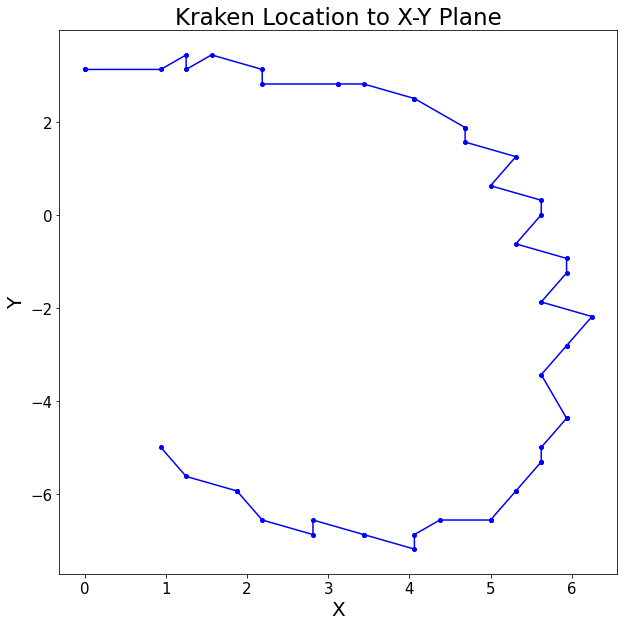

In [8]:
# Plot the projection onto the x-y plane for your reprot save as projection.png
# adject the figure size to make it look nice
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(A7[0, :], A8[0, :], '-b.', markersize=8)

# and add labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
# change the label size and axis size to make it look nice
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
# change the title size

ax.tick_params(axis='both', which='major', labelsize=15)
# change the label position to make it look nice
ax.set_title('Kraken Location to X-Y Plane')
ax.title.set_size(23)
plt.savefig('projection.png')
